__IMPORTING LIBRARIES__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

__IMPORTING DATASETS__

In [2]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")

__ANALYISING THE DATASET__

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.shape

(2224, 11)

__FINDING ANY NULL VALUE__

In [5]:
df.isnull().any()

Ticket #                       False
Customer Complaint             False
Date                           False
Date_month_year                False
Time                           False
Received Via                   False
City                           False
State                          False
Zip code                       False
Status                         False
Filing on Behalf of Someone    False
dtype: bool

#we can see there are no null values present in our dataset

__DROP COLUMNS WHICH ARE OF NO USE__

In [6]:
df.drop(['Ticket #','Time',"Filing on Behalf of Someone"],axis=1,inplace=True)

In [7]:
df.shape

(2224, 8)

#we can see earlier there were __11__ columns . Now __8__ columns are remaining. We have dropped columns __[ ticket , time and Filing on Behalf of Someone ]__
as they were of no use in our task.

## TASK 1 :-  Provide the trend chart for the number of complaints at monthly and daily granularity levels.

#convert the string __date_month_year__ to python date time object so as to extract monthly complaints and set the index to __date_month_year__

In [8]:
df['Date_month_year']=df['Date_month_year'].apply(pd.to_datetime)
df = df.set_index('Date_month_year')

In [9]:
month = df.groupby(pd.Grouper(freq='M')).size()
month    

Date_month_year
2015-01-31      55
2015-02-28      59
2015-03-31      45
2015-04-30     375
2015-05-31     317
2015-06-30    1046
2015-07-31      49
2015-08-31      67
2015-09-30      55
2015-10-31      53
2015-11-30      38
2015-12-31      65
Freq: M, dtype: int64

Text(0.5, 1.0, 'MONTHLY TRENDS')

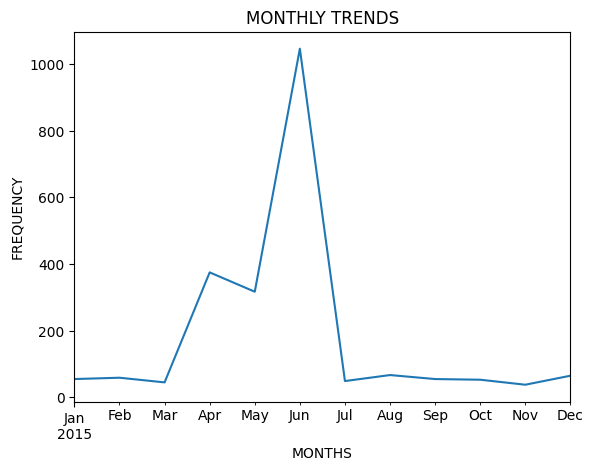

In [10]:
month.plot()
plt.xlabel("MONTHS")
plt.ylabel("FREQUENCY")
plt.title("MONTHLY TRENDS")

#WE CAN SEE FROM  THE GRAPH THAT IN THE MONTH OF __JUNE__ THERE WERE MOST COMPLAINTS

__PLOTTING DAILY TRENDS__

In [11]:
df = df.sort_values(by = "Date")

Text(0.5, 1.0, 'DAILY TRENDS')

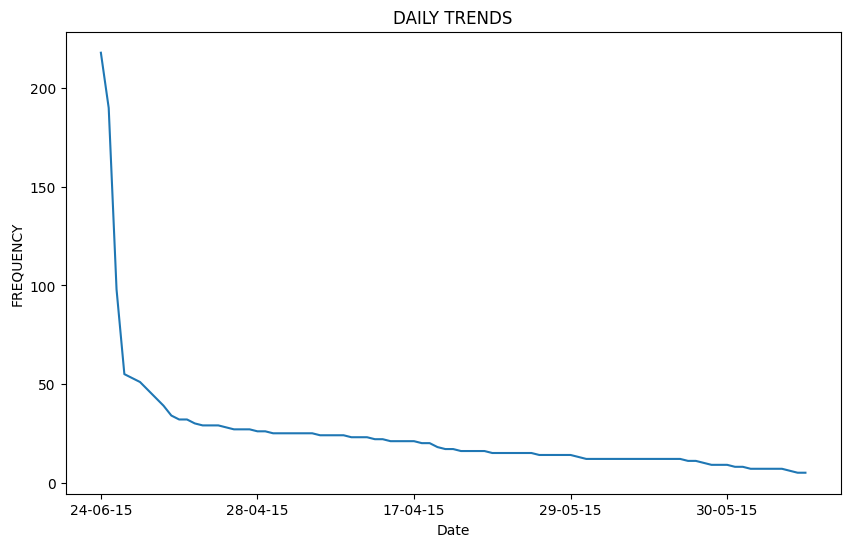

In [38]:
plt.figure(figsize=(10,6))
df['Date'].value_counts().plot()
plt.xlabel("Date")
plt.ylabel("FREQUENCY")
plt.title("DAILY TRENDS")

## TASK 2:- Provide a table with the frequency of complaint types.

In [13]:
df["Customer Complaint"].value_counts()[:9]

Customer Complaint
Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Data Caps                   11
Comcast Billing             11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast data caps            8
Name: count, dtype: int64

<Axes: xlabel='Customer Complaint'>

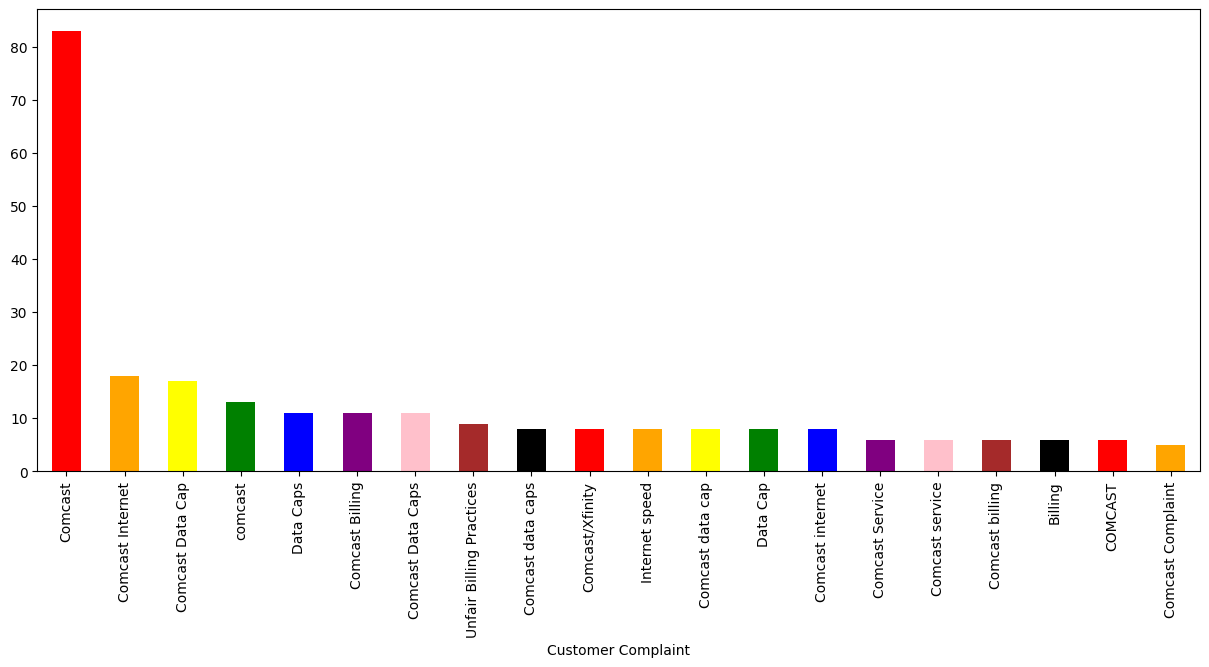

In [14]:
plt.figure(figsize=(15,6))
colors = ['Red','Orange','Yellow','Green','Blue','Purple','Pink','Brown','Black']
df["Customer Complaint"].value_counts()[:20].plot.bar(color=colors)

## TASK 3:- Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [15]:
around_internet_1 = df[df['Customer Complaint'].str.contains("network")].count()
around_internet_2 = df[df['Customer Complaint'].str.contains("internet")].count()
around_internet_3 = df[df['Customer Complaint'].str.contains("speed")].count()

In [16]:
around_bill_1 = df[df['Customer Complaint'].str.contains("bill")].count()
around_bill_2 = df[df['Customer Complaint'].str.contains("charges")].count()

In [17]:
around_services_1 = df[df["Customer Complaint"].str.contains("service")].count()
around_services_2 = df[df["Customer Complaint"].str.contains("customer service")].count()

In [18]:
total_complaints_around_internet = around_internet_1 + around_internet_2 + around_internet_3
total_complaints_around_internet

Customer Complaint    310
Date                  310
Received Via          310
City                  310
State                 310
Zip code              310
Status                310
dtype: int64

In [19]:
total_complaints_around_billing = around_bill_1 + around_bill_2
total_complaints_around_billing

Customer Complaint    227
Date                  227
Received Via          227
City                  227
State                 227
Zip code              227
Status                227
dtype: int64

In [20]:
total_complaints_around_customerservices = around_services_1 + around_services_2
total_complaints_around_customerservices

Customer Complaint    350
Date                  350
Received Via          350
City                  350
State                 350
Zip code              350
Status                350
dtype: int64

In [21]:
other_complaints = df.shape[0] - (total_complaints_around_internet + total_complaints_around_billing + total_complaints_around_customerservices)
other_complaints

Customer Complaint    1337
Date                  1337
Received Via          1337
City                  1337
State                 1337
Zip code              1337
Status                1337
dtype: int64

#we can see that other complaints are more than __internet, billing and services__

## TASK 4:- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [22]:
df["Status"].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [23]:
df["New_Status"] = ["Open" if Status == "Open" or Status == "Pending" else "Closed" for Status in df["Status"]]

In [24]:
df.head()

,Customer Complaint,Date,Received Via,City,State,Zip code,Status,New_Status
Date_month_year,,,,,,,,
2015-01-04,Fraudulent claims reported to collections agency,04-01-15,Customer Care Call,Atlanta,Georgia,30312,Closed,Closed
2015-01-04,Comcast refusal of service,04-01-15,Customer Care Call,Wayne,Pennsylvania,19087,Closed,Closed
2015-01-04,Comcast Cable,04-01-15,Internet,Franklin,Tennessee,37067,Closed,Closed
2015-01-04,Data Overages,04-01-15,Internet,Savannah,Georgia,31406,Closed,Closed
2015-01-04,Comcast,04-01-15,Internet,North Huntingdon,Pennsylvania,15642,Closed,Closed


In [25]:
df["New_Status"].unique()

array(['Closed', 'Open'], dtype=object)

## TASK 5:- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3

In [36]:
status_of_complaints = df.groupby(["State","New_Status"]).size().unstack()
status_of_complaints

New_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


<Axes: xlabel='State'>

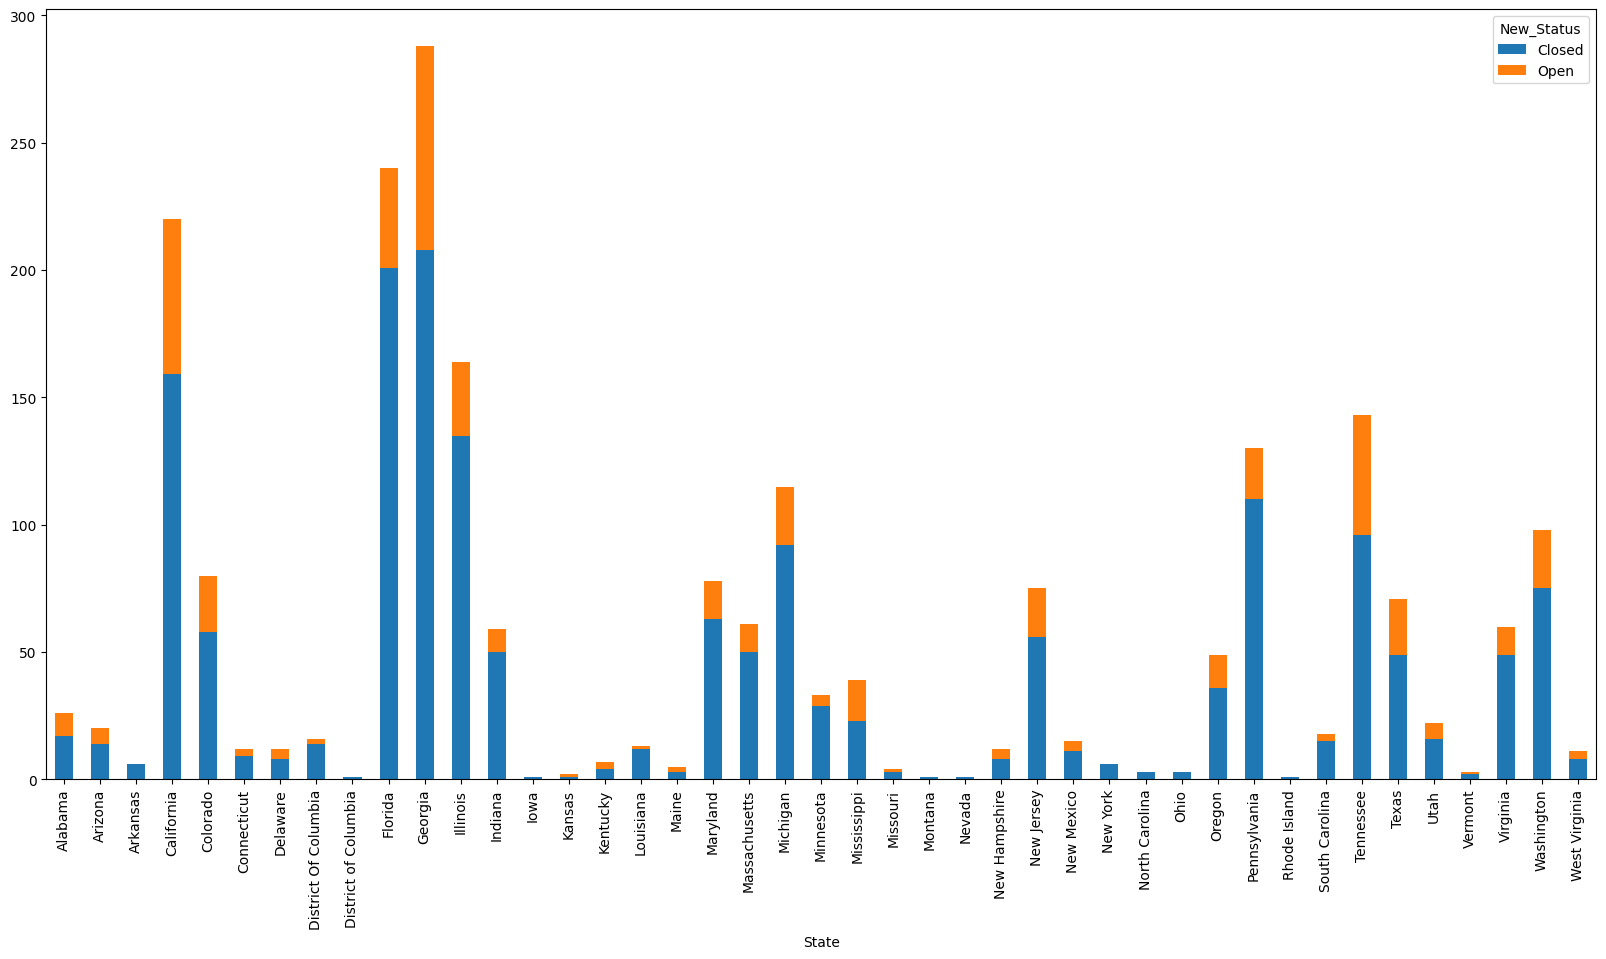

In [37]:
status_of_complaints.plot.bar(figsize=(20,10),stacked=True)

## TASK 6:- Which state has the maximum complaints

In [28]:
df.groupby("State").size().sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

#WE CAN SEE THAT THE STATE __GEORGIA__ HAS THE MAXIMUM NUMBER OF COMPLAINTS I.E __288__

## TASK 7:- Which state has the highest percentage of unresolved complaints

In [29]:
unresolved_complaints = df.groupby(["State","New_Status"]).size().unstack().fillna(0).sort_values(by="Open",ascending=False)

In [30]:
unresolved_complaints["unresolved_complaints_percentage"] = unresolved_complaints["Open"]/unresolved_complaints["Open"].sum()*100

In [31]:
unresolved_complaints

New_Status,Closed,Open,unresolved_complaints_percentage
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284
Washington,75.0,23.0,4.448743
Michigan,92.0,23.0,4.448743
Colorado,58.0,22.0,4.255319
Texas,49.0,22.0,4.255319


 #FROM THE ABOVE TABLE WE CAN CONCLUDE THAT THE STATE __GEORGIA__ HAS THE MAX PERCENTAGE OF UNRESOLVED COMPLAINTS I.E __15.47 %__ 

## TASK 8:-  Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [32]:
df["Received Via"].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [33]:
complaints_resolved = df.groupby(["Received Via","New_Status"]).size().unstack().fillna(0)
complaints_resolved

New_Status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [34]:
per_complaints_resolved = complaints_resolved["Closed"]/complaints_resolved["Closed"].sum()*100
per_complaints_resolved

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: Closed, dtype: float64

<Axes: xlabel='Received Via'>

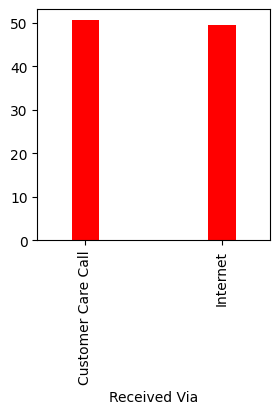

In [35]:
per_complaints_resolved.plot.bar(figsize=(3,3),width=0.2,color="red")